In [1]:
from src.ic_device_llm.configs.path_config import RESOURCES_DIR_PATH
from loguru import logger
import os
import numpy as np

In [2]:
from src.ic_device_llm.utils.deposition_data_utils import visualize_data


def process_txt_data(input_txt_path: str, output_dir_path: str, second_sep: int):
    
    # def visualize_data(file_path, output_dir, fps=10, start_time=0, end_time=None, title_font_size=1, title_color=(255, 255, 255),
    #                use_title: bool=False):
    #     visualize_data(input_txt_path, "output_folder", fps=15, start_time=0, end_time=156, title_font_size=1.2, title_color=(255, 0, 0))

    res = visualize_data(input_txt_path, output_dir_path, fps=15, start_time=0, end_time=156, title_font_size=1.2, title_color=(255, 0, 0))
    return res 

input_txt_path = RESOURCES_DIR_PATH / 'deposition' / 'all data0921' / 'sub1' / 'results_txt' / 't1.txt'

output_dir_path = RESOURCES_DIR_PATH / 'deposition' / 'all data0921' / 'sub1' / 'results_txt' / 't1'

os.makedirs(output_dir_path, exist_ok=True)

res = process_txt_data(input_txt_path, output_dir_path, 1)

2024-07-19 19:03:18.471 | INFO     | src.ic_device_llm.utils.deposition_data_utils:visualize_data:94 - Data shape: (378, 501)


In [3]:
saved_dir = RESOURCES_DIR_PATH / "deposition" / "processed_data"
os.makedirs(saved_dir, exist_ok=True)
input_root_dir = RESOURCES_DIR_PATH / 'deposition' / 'all data0921'
import pandas as pd
from tqdm import tqdm 
sub_idx = 0
for sub_dir in tqdm(input_root_dir.iterdir()):
    if sub_dir.is_dir():  # 确保我们只处理子目录
        sub_idx += 1
        logger.info(f"Processing {sub_dir}")
        xlsx_path = sub_dir / 'AIPECVD.xlsx'
        df = pd.read_excel(xlsx_path)
        columns = df.columns
        keys = list(columns)
        df = df.to_dict()

        keys.append('time_sep')
        keys.append('images') 
        txt_dir_path = sub_dir / 'results_txt'
        for txt_file in txt_dir_path.iterdir():
            if txt_file.suffix == '.txt':
                txt_idx = int(str(txt_file.stem).split('.')[0].replace('t', '')) - 1
                logger.info(f"Processing txt file: {txt_idx}")
                npz_data = {}
                for key in keys:
                    if key == 'time_sep':
                        npz_data[key] = txt_idx
                    elif key == 'images':
                        npz_data[key] = process_txt_data(txt_file, txt_dir_path, 1)
                    else:
                        npz_data[key] = df[key][txt_idx]
                
                # Save the npz file with the specified filename format
                npz_filename = f"sub{sub_idx}_{txt_idx+1}.npz"
                npz_filepath = saved_dir / npz_filename
                np.savez(npz_filepath, **npz_data)
                logger.info(f"Saved {npz_filename}")

        logger.info(f"Finished processing {sub_dir}")
#                 




0it [00:00, ?it/s]2024-07-19 19:03:19.087 | INFO     | __main__:<module>:10 - Processing C:\Users\23174\Desktop\GitHub Project\ic-device-llm\resources\deposition\all data0921\sub1
2024-07-19 19:03:19.529 | INFO     | __main__:<module>:23 - Processing txt file: 0
2024-07-19 19:03:20.016 | INFO     | src.ic_device_llm.utils.deposition_data_utils:visualize_data:94 - Data shape: (378, 501)
2024-07-19 19:03:20.053 | INFO     | __main__:<module>:37 - Saved sub1_1.npz
2024-07-19 19:03:20.054 | INFO     | __main__:<module>:23 - Processing txt file: 9
2024-07-19 19:03:20.537 | INFO     | src.ic_device_llm.utils.deposition_data_utils:visualize_data:94 - Data shape: (378, 501)
2024-07-19 19:03:20.572 | INFO     | __main__:<module>:37 - Saved sub1_10.npz
2024-07-19 19:03:20.573 | INFO     | __main__:<module>:23 - Processing txt file: 10
2024-07-19 19:03:21.056 | INFO     | src.ic_device_llm.utils.deposition_data_utils:visualize_data:94 - Data shape: (378, 501)
2024-07-19 19:03:21.093 | INFO     | 

In [6]:
import numpy as np

# 加载 .npz 文件
data = np.load('C:\\Users\\23174\\Desktop\\GitHub Project\\ic-device-llm\\resources\\deposition\\processed_data\\sub1_5.npz')

# 打印文件中的所有数组名称
print("Arrays in the file:")
print(data.files)

# 遍历并打印每个数组的基本信息
for array_name in data.files:
    array = data[array_name]
    print(f"\nArray: {array_name}")
    print(f"Shape: {array.shape}")
    print(f"Data type: {array.dtype}")
    
    # 打印数组的前几个元素（如果是大数组，只打印一部分）
    if array.size > 10:
        print("First few elements:")
        print(array.flatten()[:10])
    else:
        print("All elements:")
        print(array)

# 关闭文件
# data.close()

Arrays in the file:
['recipe', 'img_width', 'P1', 'W', 'Sp', 'dep_time', 'SiH4', 'NH3', 'SN', 'N2', 'N2O', 'NN', 'H2', 'time_sep', 'images']

Array: recipe
Shape: ()
Data type: int32
All elements:
5

Array: img_width
Shape: ()
Data type: float64
All elements:
5.08

Array: P1
Shape: ()
Data type: float64
All elements:
1200.0

Array: W
Shape: ()
Data type: float64
All elements:
1200.0

Array: Sp
Shape: ()
Data type: float64
All elements:
850.0

Array: dep_time
Shape: ()
Data type: float64
All elements:
177.0

Array: SiH4
Shape: ()
Data type: float64
All elements:
360.0

Array: NH3
Shape: ()
Data type: float64
All elements:
300.0

Array: SN
Shape: ()
Data type: float64
All elements:
1.2

Array: N2
Shape: ()
Data type: float64
All elements:
2380.0

Array: N2O
Shape: ()
Data type: float64
All elements:
300.0

Array: NN
Shape: ()
Data type: float64
All elements:
1.0

Array: H2
Shape: ()
Data type: float64
All elements:
2000.0

Array: time_sep
Shape: ()
Data type: int32
All elements:
4

Array

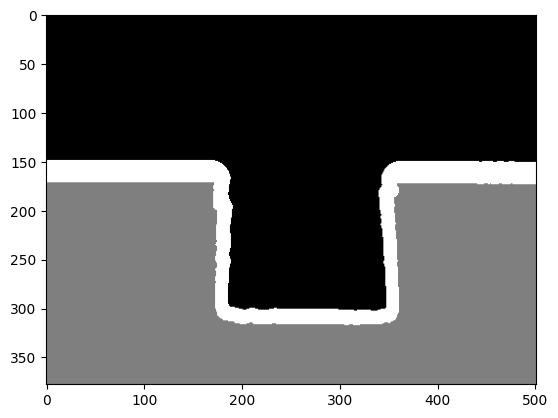

In [11]:
import matplotlib.pyplot as plt
plt.imshow(data["images"][40
           ], cmap="grey")